<a href="https://colab.research.google.com/github/seydabaldiss/buyuk_veri/blob/main/buyuk_veri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()


Saving employe_information_dataset.xlsx to employe_information_dataset (1).xlsx


In [13]:
import pandas as pd

file_path = "/content/employe_information_dataset.xlsx"
data = pd.read_excel(file_path)     # pandas ile Excel dosyası okundu
print(data.head())                  # Dosya içeriğini kontrol edin.


   ID  Age  Salary Department    Performance_Score  Training Completion Rate  \
0   1   56    6000  Marketing  2024-01-04 00:00:00                      91.0   
1   2   46    7052         HR  1968-01-01 00:00:00                      63.0   
2   3   32    4738  Marketing  1978-07-01 00:00:00                      86.0   
3   4   60    5498         HR  1945-03-01 00:00:00                      94.0   
4   5   25    7732    Finance  2024-08-09 00:00:00                      96.0   

        Productivity  
0  42770204194858400  
1  31017396501827700  
2  14517728336446900  
3   3876309789415420  
4  46214394971114800  


In [14]:
print(data['Training Completion Rate'].head(20))  # İlk 50 satırı göster

0     91.0
1     63.0
2     86.0
3     94.0
4     96.0
5     88.0
6     51.0
7      NaN
8     74.0
9     51.0
10    54.0
11    89.0
12    85.0
13    96.0
14    59.0
15     NaN
16    59.0
17    61.0
18    50.0
19    57.0
Name: Training Completion Rate, dtype: float64


In [15]:
# EKSİK VERİ DOLDURMA

# Hangi sütunda kaç eksik değer var?
print(data.isnull().sum())

#training completion rate sütununda 47 adet boş olan kayıt bulundu

ID                           0
Age                          0
Salary                       0
Department                   0
Performance_Score            0
Training Completion Rate    47
Productivity                 0
dtype: int64


In [16]:
# Training Completion Rate sütunundaki boş olan değerlerini sütunun ortalamasıyla dolduruldu
data['Training Completion Rate'].fillna(data['Training Completion Rate'].mean(), inplace=True)


<ipython-input-16-e0b69489d0f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Training Completion Rate'].fillna(data['Training Completion Rate'].mean(), inplace=True)


In [17]:
print(data['Training Completion Rate'].isnull().sum())   #Training Completion Rate sütununda boş olan verilerin sayısı doldurulduktan sonra kontrol edildi.

0


In [18]:
print(data['Training Completion Rate'].head(20))  # İlk 50 satırı göster

0     91.000000
1     63.000000
2     86.000000
3     94.000000
4     96.000000
5     88.000000
6     51.000000
7     73.863135
8     74.000000
9     51.000000
10    54.000000
11    89.000000
12    85.000000
13    96.000000
14    59.000000
15    73.863135
16    59.000000
17    61.000000
18    50.000000
19    57.000000
Name: Training Completion Rate, dtype: float64


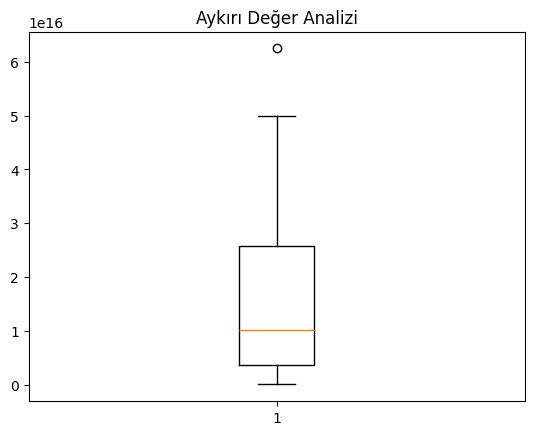

In [20]:
# AYKIRI DEĞERLERİN TESPİTİ

#Aykırı değerleri görselleştirme
import matplotlib.pyplot as plt

plt.boxplot(data['Productivity'])
plt.title('Aykırı Değer Analizi')
plt.show()

In [21]:
# IQR (Interquartile Range) yöntemiyle aykırı değerlerin tespit edilmesi
Q1 = data['Productivity'].quantile(0.25)
Q3 = data['Productivity'].quantile(0.75)
IQR = Q3 - Q1           # çeyrekler arası açıklık

# Aykırı değer sınırları
lower_bound = Q1 - 1.5 * IQR      #QR'nin 1.5 katı kadar Q1'in altına düşen değerler aykırı kabul edilir.
upper_bound = Q3 + 1.5 * IQR      #Verilerin makul üst sınırı. IQR'nin 1.5 katı kadar Q3'ün üstüne çıkan değerler aykırı kabul edilir.

# Aykırı değerlerin tespiti
outliers = data[(data['Productivity'] < lower_bound) | (data['Productivity'] > upper_bound)]
print(f"Aykırı Değerler:\n{outliers}")      #aykırı değeri yazdırdık

Aykırı Değerler:
      ID  Age  Salary Department    Performance_Score  \
311  312   39    6158  Marketing  2017-01-01 00:00:00   

     Training Completion Rate       Productivity  
311                      88.0  62469950431553000  


In [23]:
# Aykırı değerleri veri setinden çıkarma
data = data[(data['Productivity'] >= lower_bound) & (data['Productivity'] <= upper_bound)]

In [25]:
print(data.iloc[:320])  # İlk 320 satırı yazdır


      ID  Age  Salary Department    Performance_Score  \
0      1   56    6000  Marketing  2024-01-04 00:00:00   
1      2   46    7052         HR  1968-01-01 00:00:00   
2      3   32    4738  Marketing  1978-07-01 00:00:00   
3      4   60    5498         HR  1945-03-01 00:00:00   
4      5   25    7732    Finance  2024-08-09 00:00:00   
5      6   38    7387         HR  1974-05-01 00:00:00   
6      7   56    9744  Marketing  2021-08-01 00:00:00   
7      8   36    7536    Finance  1981-09-01 00:00:00   
8      9   40    7287    Finance  1956-08-01 00:00:00   
9     10   28    5913    Finance  2024-08-08 00:00:00   
10    11   28    3066  Marketing  1967-04-01 00:00:00   
11    12   41    9723         IT  1997-05-01 00:00:00   
12    13   53    6380         IT  2028-03-01 00:00:00   
13    14   57    4444         IT  1977-02-01 00:00:00   
14    15   41    6107  Marketing  1955-05-01 00:00:00   
15    16   20    7726    Finance  1936-06-01 00:00:00   
16    17   39    5373         I

In [26]:
#VERİ DÖNÜŞTÜRME

#Salary sütununu 0 ve 1 arasında normalizasyon yapılması
from sklearn.preprocessing import MinMaxScaler    #MinMaxScaler sınıfını import ettik

scaler = MinMaxScaler()
data['Salary_Normalized'] = scaler.fit_transform(data[['Salary']])    #min ve max değerler bulunarak veriyi uygun aralığa dönüştürdük
print(data[['Salary', 'Salary_Normalized']].head())

   Salary  Salary_Normalized
0    6000           0.502202
1    7052           0.634579
2    4738           0.343400
3    5498           0.439034
4    7732           0.720146


In [27]:
data.to_csv("cleaned_dataset.csv", index=False)

from google.colab import files

files.download("cleaned_dataset.csv")  # İndirilebilir hale getir

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Özet: Yapılan İşlemler

	1.	Eksik veriler tespit edilip dolduruldu.
	2.	Aykırı değerler analiz edildi ve veri setinden çıkarıldı.
	3.	Sayısal veriler normalleştirildi.
  4.  İşlenmiş veri tekrar kaydedildi.